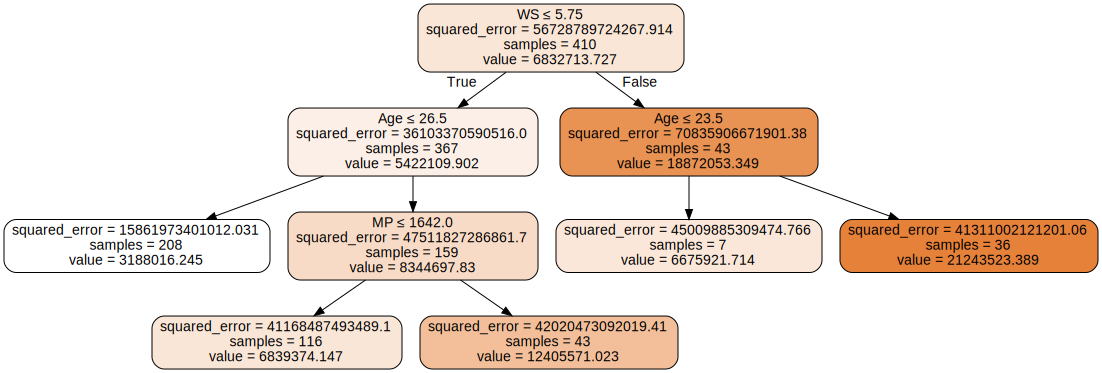

In [15]:
# Solution
# import some packages
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import metrics

df = pd.read_csv('nba_salary.csv')
df = df.dropna()

# Assign input variables
X = df.loc[:,['NBA_DraftNumber', 'Age', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']]

# Assign target variable
y = df['Salary']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.15)

# Create a decision tree and train
from sklearn.tree import DecisionTreeRegressor

tree1 = DecisionTreeRegressor(criterion='squared_error', max_leaf_nodes=5)
tree1.fit(x_train, y_train)

from sklearn import tree

import graphviz 

dot_data = tree.export_graphviz(tree1, out_file=None) 
dot_data = tree.export_graphviz(tree1, out_file=None, 
                     feature_names=x_train.columns,  
                     class_names=['Not Survived','Survived'],  
                     filled=True, rounded=True,  
                     special_characters=True)  

graph = graphviz.Source(dot_data)  

graph



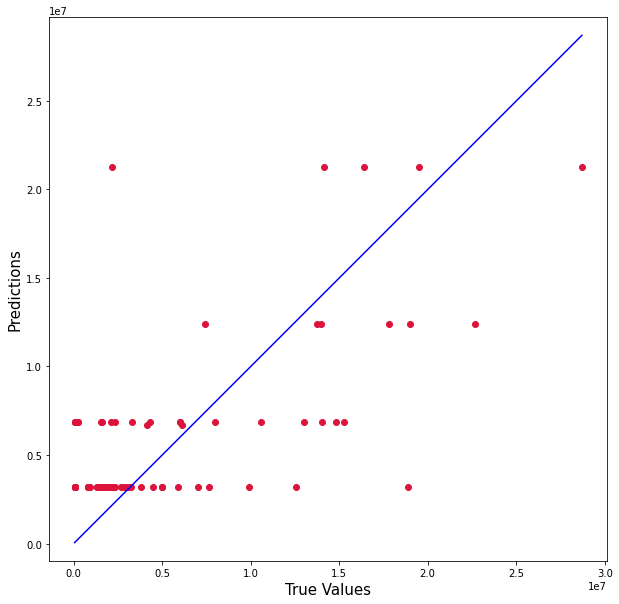

In [16]:
import matplotlib.pyplot as plt

predicted_value = tree1.predict(x_test)
true_value = y_test

plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


In [17]:
from sklearn.metrics import r2_score
print('Rsquared on Testing: ', np.round(r2_score(y_test, tree1.predict(x_test)), 3))

Rsquared on Testing:  0.395


## Classification

In [18]:
# Solution
# import some packages
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import metrics

df = pd.read_csv('breast_cancer.csv')

In [19]:
# Assign target variable
y = df['diagnosis']

# Assign input variables
X = df.loc[:,['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.15)

In [20]:
# df.isna().sum()
# Create a decision tree and train
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=3)
tree1.fit(x_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

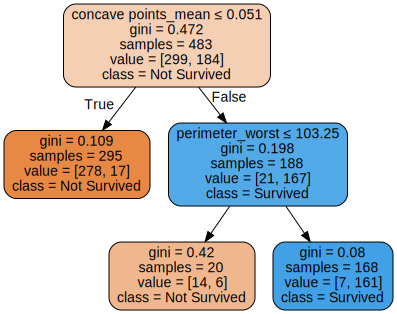

In [21]:
from sklearn import tree

import graphviz 

dot_data = tree.export_graphviz(tree1, out_file=None) 
dot_data = tree.export_graphviz(tree1, out_file=None, 
                     feature_names=x_train.columns,  
                     class_names=['Not Survived','Survived'],  
                     filled=True, rounded=True,  
                     special_characters=True)  

graph = graphviz.Source(dot_data)  

graph

In [22]:
ypred_test = tree1.predict(x_test)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ypred_test, y_test)
print('===============')
print('Confusion Matrix:')
print(mat)
print('===============')
print('Testing Accuracy:')
print(mat.diagonal().sum()/mat.sum())
print('===============')

Confusion Matrix:
[[56  4]
 [ 2 24]]
Testing Accuracy:
0.9302325581395349
